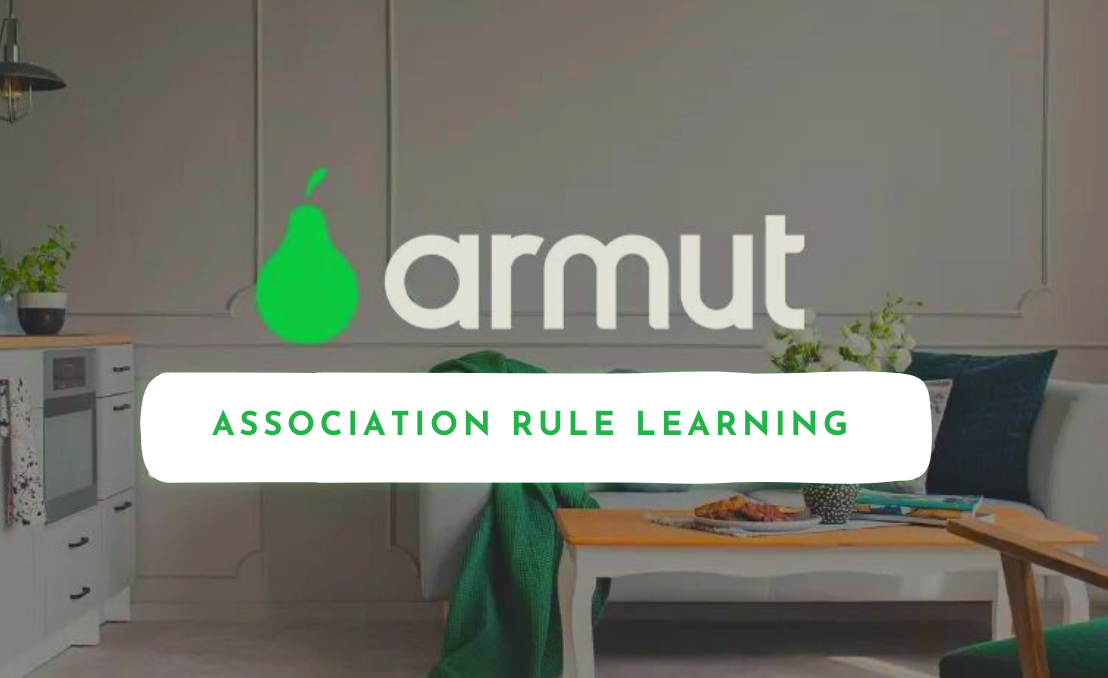

<div style="padding: 15px; background-color: #E1E7B4; font-size:100%; text-align:left">

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#E1E7B4;color:#89A25B;border-radius:15px;font-size:100%;text-align: left'>➣ What is the ARL (Association Rule Learning)?</div></b>
    
    
**Association Rule Learning** is a machine learning method that leverages rules to uncover interesting relationships between variables in large datasets. At the heart of this technique lies the **Apriori Algorithm**, which specializes in market basket analysis to identify items that frequently occur together.

In the realm of Apriori, three key metrics are paramount:

**1-Support** indicates the frequency of occurrence of a particular itemset (e.g., products X and Y bought together) relative to the overall number of transactions.
    <h4 align="left"><font color='#89A25B'>Support(X, Y) = Freq(X, Y) / Total Transaction </font></h4>

**2-Confidence** assesses the likelihood of seeing product Y in transactions given that product X is already present.
        <h4 align="left"><font color='#89A25B'>Confidence(X, Y) = Freq(X, Y) / Freq(X) </font></h4>

**3-Lift** evaluates the increase in the probability of purchasing Y when X is bought, compared to the probability of purchasing Y independently. 
        <h4 align="left"><font color='#89A25B'>Lift = Support(X, Y) / (Support(X) * Support(Y)) </font></h4>

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:white;color:#89A25B;border-radius:15px;font-size:100%;text-align: left'>➣Aim</div></b>

**Armut**, Turkey's largest online service platform, connects service providers with those seeking services, such as cleaning, renovation, and moving, through just a few taps on a computer or smartphone. The goal is to utilize the dataset, which includes information on services received by users and the categories of these services, to develop a product recommendation system using **Association Rule Learning**.

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:white;color:#89A25B;border-radius:15px;font-size:100%;text-align: left'>➣Data Overview</div></b>

This dataset captures the array of services utilized by customers, along with the service categories to which they belong.

Each entry details the timing of the service provided.

**CustomerID:** Identifies each customer uniquely.

**ServiceCode:** Encrypted service identifiers within each category (For instance, a ServiceCode for couch cleaning falls under the housekeeping category).

A single ServiceCode might correspond to distinct services across various categories, implying different services for the same code based on the category (For example, ServiceCode 4 under Category 5 might mean deep carpet cleaning, whereas under Category 3, it could signify wall painting).

**CategoryCode:** Encrypted identifiers for service categories (For instance, categories such as house cleaning, moving services, or home improvements).

**ServicePurchaseDate:** The date on which the service was ordered.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#437F31; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #437F31">🍐Road Map</p>
<h4 align="left"><font color='#89A25B'>1-Preprocessing the Data </font></h4>
<h4 align="left"><font color='#89A25B'>2-Setting Up the Data Structure for ARL </font></h4>
<h4 align="left"><font color='#89A25B'>3-Deriving Association Rules </font></h4>
<h4 align="left"><font color='#89A25B'>4-Recommending Service to Users at Checkout </font></h4>





<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:white;color:#89A25B;border-radius:15px;font-size:100%;text-align: left'>1-Preprocessing the Data</div></b>

In [1]:
# import Required Libraries

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Adjusting Row Column Settings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

In [3]:
# Loading the Data Set

df = pd.read_csv("/kaggle/input/armut-data/armut_data.csv")

In [4]:
# Preliminary examination of the data set

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(162523, 4)
##################### Types #####################
UserId         int64
ServiceId      int64
CategoryId     int64
CreateDate    object
dtype: object
##################### Head #####################
   UserId  ServiceId  CategoryId           CreateDate
0   25446          4           5  2017-08-06 16:11:00
1   22948         48           5  2017-08-06 16:12:00
2   10618          0           8  2017-08-06 16:13:00
3    7256          9           4  2017-08-06 16:14:00
4   25446         48           5  2017-08-06 16:16:00
##################### Tail #####################
        UserId  ServiceId  CategoryId           CreateDate
162518   10591         25           0  2018-08-06 14:40:00
162519   10591          2           0  2018-08-06 14:43:00
162520   10591         31           6  2018-08-06 14:47:00
162521   12666         38           4  2018-08-06 16:01:00
162522   17497         47           7  2018-08-06 16:04:00
##############

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:white;color:#89A25B;border-radius:15px;font-size:100%;text-align: left'>2-Setting Up the Data Structure for ARL</div></b>

In [5]:
#Combine ServiceID and CategoryID with an underscore '_' to uniquely identify each service item.
df["Service"] = [str(row[1]) + "_" + str(row[2]) for row in df.values]

In [6]:
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Service
0,25446,4,5,2017-08-06 16:11:00,4_5
1,22948,48,5,2017-08-06 16:12:00,48_5
2,10618,0,8,2017-08-06 16:13:00,0_8
3,7256,9,4,2017-08-06 16:14:00,9_4
4,25446,48,5,2017-08-06 16:16:00,48_5


In [7]:
df["CreateDate"] = pd.to_datetime(df["CreateDate"])

In [8]:
df["NEW_DATE"] = df["CreateDate"].dt.strftime("%Y-%m")

In [9]:
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Service,NEW_DATE
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08


In [10]:
df["BasketID"] = [str(row[0]) + "_" + str(row[5]) for row in df.values]

In [11]:
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Service,NEW_DATE,BasketID
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08,25446_2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08,22948_2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08,10618_2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08,7256_2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08,25446_2017-08


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:white;color:#89A25B;border-radius:15px;font-size:100%;text-align: left'>3-Deriving Association Rules </div></b>

In [12]:
# Invoice-Product Matrix created

invoice_product_df = df.groupby(['BasketID', 'Service'])['Service'].count().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)

/tmp/ipykernel_18/3281242793.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  invoice_product_df = df.groupby(['BasketID', 'Service'])['Service'].count().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)


In [13]:
invoice_product_df.head()

Service,0_8,10_9,11_11,12_7,13_11,14_7,15_1,16_8,17_5,18_4,19_6,1_4,20_5,21_5,22_0,23_10,24_10,25_0,26_7,27_7,28_4,29_0,2_0,30_2,31_6,32_4,33_4,34_6,35_11,36_1,37_0,38_4,39_10,3_5,40_8,41_3,42_1,43_2,44_0,45_6,46_4,47_7,48_5,49_1,4_5,5_11,6_7,7_3,8_5,9_4
BasketID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
0_2017-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
0_2018-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
0_2018-04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10000_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [14]:
# We obtained all probabilities by creating association rules with apriori.

frequent_itemsets = apriori(invoice_product_df, min_support=0.01, use_colnames=True)

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
frequent_itemsets.head()

,support,itemsets
0,0.019728,(0_8)
1,0.026523,(11_11)
2,0.029374,(12_7)
3,0.056627,(13_11)
4,0.023406,(14_7)


In [16]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)

In [17]:
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(13_11),(2_0),0.056627,0.130286,0.012819,0.226382,1.737574,0.005442,1.124216,0.449965
1,(2_0),(13_11),0.130286,0.056627,0.012819,0.098394,1.737574,0.005442,1.046325,0.488074
2,(15_1),(2_0),0.120963,0.130286,0.033951,0.280673,2.154278,0.018191,1.209066,0.609539
3,(2_0),(15_1),0.130286,0.120963,0.033951,0.260588,2.154278,0.018191,1.188833,0.616073
4,(33_4),(15_1),0.027310,0.120963,0.011233,0.411311,3.400299,0.007929,1.493211,0.725728
5,(15_1),(33_4),0.120963,0.027310,0.011233,0.092861,3.400299,0.007929,1.072262,0.803047
6,(15_1),(38_4),0.120963,0.066568,0.011177,0.092397,1.388001,0.003124,1.028458,0.318007
7,(38_4),(15_1),0.066568,0.120963,0.011177,0.167897,1.388001,0.003124,1.056404,0.299475
8,(15_1),(49_1),0.120963,0.067762,0.010011,0.082763,1.221375,0.001815,1.016354,0.206192
9,(49_1),(15_1),0.067762,0.120963,0.010011,0.147741,1.221375,0.001815,1.031420,0.194425


<div style="padding: 15px; background-color: #FFECDA; font-size:120%; text-align:left">

### Here's what each column typically means when you use metric="support" and set a min_threshold of 0.01:

**antecedents:** The item(s) on the left-hand side of the rule. This is the condition of the rule and represents the item(s) a customer buys first.

**consequents:** The item(s) on the right-hand side of the rule. This represents the item(s) that are likely to be bought together with the antecedents.

**antecedent support:** The proportion of transactions in the dataset that contain the antecedents. It shows how frequently the antecedent itemset appears in the dataset.

**consequent support:** The proportion of transactions in the dataset that contain the consequents. It indicates the frequency of the consequent itemset.

**support:** The support of the entire rule, i.e., the frequency with which the combined itemset (antecedents and consequents together) appears in the dataset. It's calculated by dividing the number of transactions that include all items by the total number of transactions.

**confidence:** The probability of seeing the consequents in transactions given that the transaction already contains the antecedents. It's calculated by dividing the support of the rule by the support of the antecedents.

**lift:** A measure of the strength of a rule, defined as the ratio of the observed support to that expected if the antecedents and consequents were independent. A lift value greater than 1 indicates that the antecedents and consequents appear more often together than expected, showing a positive relationship between them.

**leverage:** A measure that quantifies the difference in the support of the rule from the support expected if the antecedents and consequents were independent. Positive values indicate a positive association between antecedents and consequents.

**conviction:** A measure of the rule's reliability. It compares the probability of the consequents appearing without the antecedents if they were dependent with the actual observed frequency of the consequents appearing without the antecedents. A higher conviction means the antecedents have a greater effect on the consequents.

These metrics help in evaluating the strength, reliability, and usefulness of the generated association rules in predicting consequent item(s) based on antecedent item(s).

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:white;color:#89A25B;border-radius:15px;font-size:100%;text-align: left'>4-Recommending Service to Users at Checkout </div></b>

In [18]:
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = [] 
    for i, product in sorted_rules["antecedents"].items():
        for j in list(product): 
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"]))
    recommendation_list = list({item for item_list in recommendation_list for item in item_list})
    return recommendation_list[:rec_count] 

###This function, arl_recommender, takes a DataFrame of association rules, a specific product_id, and an optional number of recommendations (rec_count) to generate. It sorts the rules by descending lift values to prioritize stronger associations. For the given product_id, it iterates through the sorted rules to find any rules where the product is an antecedent, then collects the associated consequents as recommendations. Finally, it returns the unique set of recommended product IDs, limited by the rec_count parameter, ensuring the most relevant suggestions based on the association strength.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#437F31; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #437F31">🍐Prediction </p>

In [19]:
arl_recommender(rules,"9_4", 5)

['49_1']

In [20]:
arl_recommender(rules,"22_0", 5)

['13_11', '15_1']

In [21]:
arl_recommender(rules,"15_1", 5)

['9_4', '15_1', '22_0', '25_0']

<div style="padding: 15px; background-color: #E1E7B4; font-size:100%; text-align:left">
    
<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#E1E7B4;color:#89A25B;border-radius:15px;font-size:100%;text-align: left'>➣ Conclusion</div></b>
Using Association Rule Learning, we've successfully implemented a recommendation system that suggests services to customers based on their preferences and behaviors. This approach allows us to offer highly relevant and personalized service recommendations, enhancing the overall customer experience.

<div style="text-align: center; border-radius: 10px; border: solid #484366; padding: 15px; background-color: #FFECDA; font-size: 140%;">
    Thank you for taking the time to review my work 📝<br><br> 🌟 Your feedback, comments, and likes are invaluable to me as they help improve and refine this project further<br><br>Please feel free to share your thoughts and suggestions 💭💬
</div>
